ПРОЕКТ:
0) Изучаете контекст датасета и придумываете бизнес-цель
1) Делаете постановку задач на исследование (минимум 2 задачи, 1 под классфификацию/регрессию, 1 под кластеризацию (в крайнем случае делаем допущение что у нас нет Y) , )
2) Оценка Датасета (pandas/np/statsmodel...)
3) Подготовка данных
4) Выполнение исследований ( в том числе с промежуточными итогами, визуализациями)
5) Итоговые визуализации и выводы
6) Предложения по развитию вашей работы
1. Кластеризация

Заказчик, в лице одного из крупнейших банков, пожелавший оставаться инкогнито, обратился с просьбой провести исследование клиентской базы 
для определения дальнейшей маркетинговой стратегии банка.
Цель исследования: изучить финансовое поведение пользователей кредитных карт пользователей банка, влияние и взаимодействие факторов, 
определяющих это поведение. В конечном итоге, рассмотреть взаимосвязи и распределить клиентов по неким классам, согласно их финансовому поведению, для того чтобы банк в дальнейшем мог предлагать различные программы обслуживания подстраиваясь и исходя из того к какому классу относится пользователь кредитной карты.
Банк предоставил данные обезличенных активных пользователей кредитных карт, в количестве около 9000 человек, за последние 6 месяцев.
В данном наборе содержится 18 признаков, описание которых представлено в таблице ниже:

Название признака	Описание

CUSTID	Идентификатор держателя кредитной карты
BALANCE	Сумма баланса, оставшаяся на счету для совершения покупок
BALANCEFREQUENCY	Как часто обновляется баланс, оценка от 0 до 1 (1 = часто обновляется, 0 = редко обновляется).
PURCHASES	Сумма покупок, сделанных со счета
ONEOFFPURCHASES	Максимальная сумма единовременной покупки
INSTALLMENTSPURCHASES	Сумма покупок в рассрочку
CASHADVANCE	Предоставление наличных денег пользователем
PURCHASESFREQUENCY	Как часто совершаются покупки, от 0 до 1 (1 = часто покупают, 0 = редко покупают).
ONEOFFPURCHASESFREQUENCY	Как часто совершаются разовые покупки (1 = часто покупаются, 0 = редко покупаются)
PURCHASESINSTALLMENTSFREQUENCY	Как часто совершаются покупки в рассрочку (1 = часто, 0 = редко)
CASHADVANCEFREQUENCY	Как часто выплачиваются наличные авансом
CASHADVANCETRX	Количество транзакций, совершенных с помощью «Cash in Advanced»
PURCHASESTRX	Количество совершенных транзакций покупки
CREDITLIMIT	Лимит кредитной карты для пользователя
PAYMENTS	Сумма платежей, сделанных пользователем
MINIMUM_PAYMENTS	Минимальная сумма платежей пользователя
PRCFULLPAYMENT	Процент от полной оплаты, уплаченный пользователем
TENURE	Срок обслуживания кредитной карты для пользователя


In [1]:
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.metrics import silhouette_score
from sklearn.metrics import davies_bouldin_score
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.impute import KNNImputer
from sklearn.manifold import TSNE
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
cc_general = pd.read_csv('CC_GENERAL.csv')
cc_general.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


Перед тем как приступить к анализу, данные необходимо обработать и подготовить их к анализу. 
Проверим пустые значения в наших данных.

In [2]:
cc_general.isna().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

Итак пустые строки присутствуют, но избавимся мы от них немного позже. Сейчас же изучим нашу выборку на наличие выбросов.
Найдем выбросы используя IQR(межквартильный размах)
Для начала вычислим первый и третий квантили Q1 и Q3
Затем оценим межквартильный размах IQR= Q3 - Q1
Оцениваем нижнюю и верхнюю границы: minimum и maximum
Точки данных, лежащие за пределами нижней и верхней границ, являются выбросами.

In [3]:
def outlier_percent(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    minimum = Q1 - (1.5 * IQR)
    maximum = Q3 + (1.5 * IQR)
    num_outliers = np.sum((data < minimum) | (data > maximum))
    num_total = data.count()
    return (num_outliers/num_total)*100


non_categorical_data = cc_general.drop(['CUST_ID'], axis=1)
for column in non_categorical_data.columns:
    data = non_categorical_data[column]
    percent = str(round(outlier_percent(data), 2))

Установим всем выбросам значение NaN

In [4]:
for column in non_categorical_data.columns:
    data = non_categorical_data[column]

    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    minimum = Q1 - (1.5 * IQR)
    maximum = Q3 + (1.5 * IQR)

    outliers = ((data < minimum) | (data > maximum))
    non_categorical_data[column].loc[outliers] = np.nan

In [5]:
non_categorical_data.isna().sum()

BALANCE                              695
BALANCE_FREQUENCY                   1493
PURCHASES                            808
ONEOFF_PURCHASES                    1013
INSTALLMENTS_PURCHASES               867
CASH_ADVANCE                        1030
PURCHASES_FREQUENCY                    0
ONEOFF_PURCHASES_FREQUENCY           782
PURCHASES_INSTALLMENTS_FREQUENCY       0
CASH_ADVANCE_FREQUENCY               525
CASH_ADVANCE_TRX                     804
PURCHASES_TRX                        766
CREDIT_LIMIT                         249
PAYMENTS                             808
MINIMUM_PAYMENTS                    1154
PRC_FULL_PAYMENT                    1474
TENURE                              1366
dtype: int64

Теперь когда все наши выбросы заменены Nan значением, вспоминаем про пустые строки которые мы определили изначально и избавимся от всех них разом. Для этого используем метод к-ближних соседей(KNN) из обучающегося набора

In [6]:
imputer = KNNImputer()
imp_data = pd.DataFrame(imputer.fit_transform(
    non_categorical_data), columns=non_categorical_data.columns)


In [7]:
imp_data.isna().sum()

BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

Итак мы избавились от пустых строк и от выбросов в наших данных.

Затем стандартизируем наши данные при помощи StandardScaler.
Прежде чем перейти к стандартизации, давайте сначала разберемся с концепцией масштабирования. Масштабирование функций – важный шаг в моделировании алгоритмов с помощью наборов данных.

Итак, полученные данные содержат в совокупности признаки разного размера и масштаба. Различные масштабы функций данных отрицательно влияют на моделирование набора данных. 

Это приводит к предвзятому результату прогнозов с точки зрения ошибок классификации и показателей точности. Таким образом, перед моделированием необходимо масштабировать данные. 

Вот тут-то и появляется стандартизация. 
Стандартизация – это метод масштабирования, при котором данные не масштабируются путем преобразования статистического распределения данных в следующий формат: среднее – 0 (ноль); стандартное отклонение – 1. 
 
Таким образом, весь набор данных масштабируется вместе с нулевым значением и единичной дисперсией.



In [8]:
std_imp_data = pd.DataFrame(StandardScaler().fit_transform(imp_data), columns=imp_data.columns)
std_imp_data.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03,8950.000000,8.950000e+03,8950.0
mean,-1.079707e-16,3.048586e-16,3.810732e-17,-1.270244e-17,1.429024e-17,-9.526830e-18,9.328354e-17,5.080976e-17,5.716098e-17,-9.645915e-17,-5.626784e-17,-2.540488e-17,1.143220e-16,2.540488e-17,0.000000,-3.493171e-17,0.0
std,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056,1.000056e+00,0.0
min,-9.705424e-01,-4.155613e+00,-9.108903e-01,-6.680081e-01,-7.877010e-01,-6.489617e-01,-1.221758e+00,-7.445069e-01,-9.169952e-01,-7.471386e-01,-6.816397e-01,-9.664333e-01,-1.365341e+00,-1.191788e+00,-1.158651,-4.496321e-01,0.0
25%,-8.698460e-01,3.667368e-01,-8.520893e-01,-6.680081e-01,-7.877010e-01,-6.489617e-01,-1.014125e+00,-7.445069e-01,-9.169952e-01,-7.471386e-01,-6.816397e-01,-8.736430e-01,-8.652070e-01,-8.090585e-01,-0.780375,-4.496321e-01,0.0
50%,-2.885189e-01,3.667368e-01,-3.756604e-01,-5.869491e-01,-4.754999e-01,-6.489617e-01,2.404259e-02,-3.779420e-01,-4.976286e-01,-7.471386e-01,-6.816397e-01,-3.169012e-01,-4.134727e-01,-3.372088e-01,-0.424355,-4.496321e-01,0.0
75%,5.627647e-01,3.667368e-01,6.123033e-01,3.670389e-01,5.317870e-01,5.418314e-01,1.062211e+00,4.285057e-01,9.701506e-01,4.369621e-01,4.783904e-01,6.110018e-01,6.513295e-01,6.760408e-01,0.636420,-2.118974e-01,0.0
max,2.909891e+00,3.667368e-01,3.121026e+00,3.512621e+00,3.318234e+00,3.338116e+00,1.269843e+00,2.554590e+00,1.599199e+00,3.128095e+00,3.185127e+00,2.837969e+00,3.006801e+00,2.979580e+00,2.850882,4.305075e+00,0.0


В дальнейшем для кластеризации будет использован метод k-means, или же метод к-средних. Этот метод как и многие другие популярные методы начинает терять свои значения при увеличении количества измерений, поэтому воспользуемся методом главных компонент( РСА)

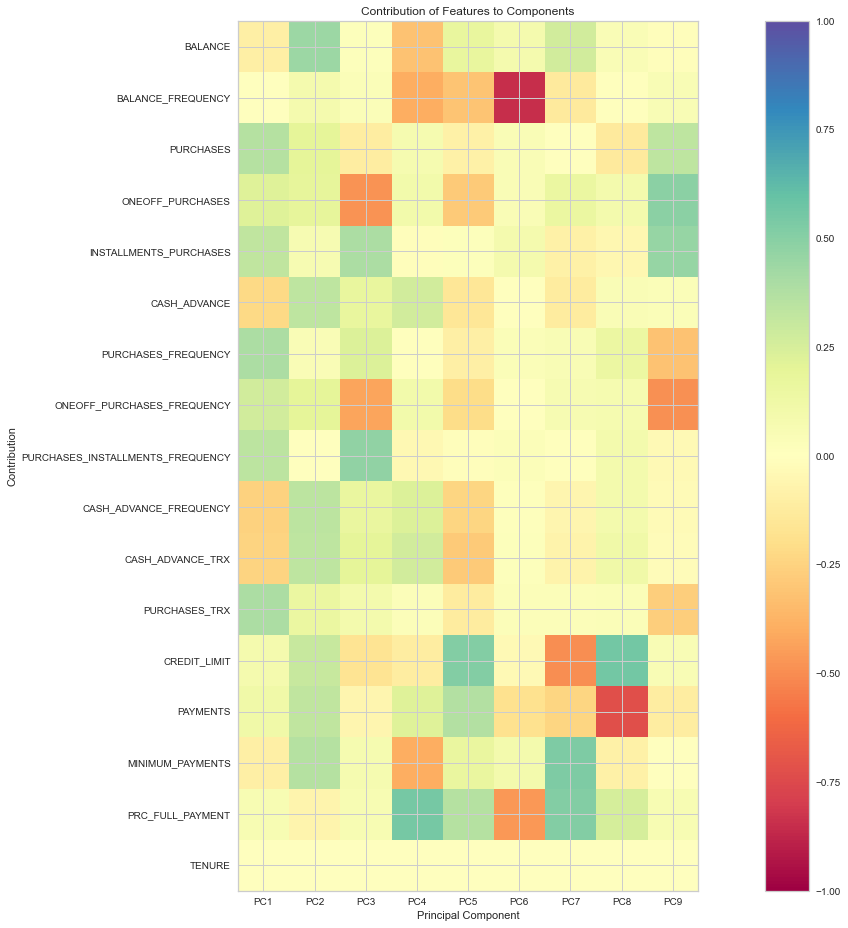

In [9]:
pca = PCA(n_components=0.9, random_state=42)
pca.fit(std_imp_data)
PC_names = ['PC'+str(x) for x in range(1, len(pca.components_)+1)]
pca_data = pd.DataFrame(pca.transform(std_imp_data), columns=PC_names)

fig, ax = plt.subplots(figsize=(24, 16))
plt.imshow(pca.components_.T,
           cmap="Spectral",
           vmin=-1,
           vmax=1,
           )
plt.yticks(range(len(std_imp_data.columns)), std_imp_data.columns)
plt.xticks(range(len(pca_data.columns)), pca_data.columns)
plt.xlabel("Principal Component")
plt.ylabel("Contribution")
plt.title("Contribution of Features to Components")
plt.colorbar()

Для исследования был выбран метод кластеризации к-средних. Описание работы метода:
	Назначается число групп k, на которые должны быть разбиты данные. Случайно выбирается  k объектов исходного набора как первоначальные центры кластеров Ck .
	
    Каждый объект относится к определенному кластеру на основании наименьшей меры близости между объектом и точкой Ck .
	
    Пересчитываются координаты центроидов μ_k  всех  k  кластеров и вычисляются внутригрупповые разбросы (within-cluster variation) 

Если набор данных включает р переменных, то μ_k  представляет 	собой вектор средних с p элементами
	
    Минимизируется общий внутригрупповой разброс, для чего шаги 2 и 3 повторяются многократно, пока назначения групп не прекращают изменяться или не достигнуто заданное число итераций.
	
    Для начала нам нужно определить число кластеров. Для этого воспользуемся методом локтя( Elbow method).
	Данный метод рассматривает характер изменения общего внутригруппового разброса с увеличением числа групп  k:

При объединении всех  n  наблюдений в одну группу эта группа получает наибольшую внутрикластерную дисперсию, которая снижается до 0 при k→n . 



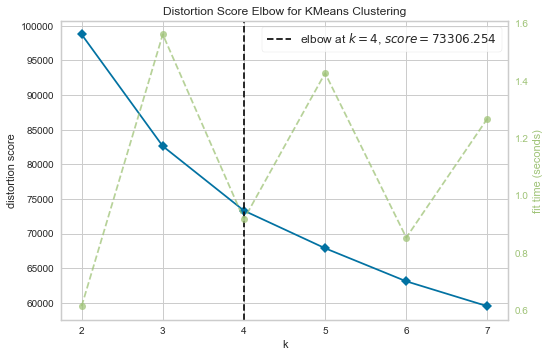

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [10]:
model = KMeans(random_state=42)
distortion_visualizer = KElbowVisualizer(model, k=(2, 8))

distortion_visualizer.fit(pca_data)
distortion_visualizer.show()


Итак по этому графику мы видим, что оптимальное число кластеров для наших данных = 4.
Далее переходим к самому методу кластеризации.

In [11]:
km_model = KMeans(distortion_visualizer.elbow_value_, random_state=42)
labels = km_model.fit_predict(pca_data)
pca_data['LABELS'] = labels
cc_general['LABELS'] = labels
std_imp_data['LABELS'] = labels



Посмотрим как наши данные распределились между этими 4 кластерами.

<AxesSubplot:ylabel='LABELS'>

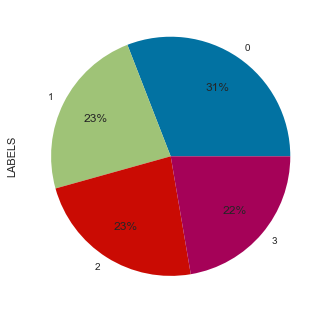

In [12]:
pca_data.LABELS.value_counts().plot.pie(autopct='%1.0f%%', pctdistance=0.7, labeldistance=1.1)

Данные распределились вполне неплохо, но чтобы убедиться в том насколько хорошо отработала наша модель, применим две метрики:
1.Индекс Дэвиса-Булдина — это среднее сходство между каждым кластером и ближайшим кластером. Оценки варьируются от 0 и выше 0 и указывают на лучшую кластеризацию.
2.Коэффициент силуэта — это значение от -1 до 1. Чем выше значение, тем лучше. 1 указывает на тесные кластеры, а 0 означает перекрывающиеся кластеры.

In [13]:
print(f'Davies-Bouldin index = {davies_bouldin_score(pca_data, labels)}')
print(f'Silhouette Score = {silhouette_score(pca_data, labels)}')

Davies-Bouldin index = 1.4928737670744905
Silhouette Score = 0.2578488108872972


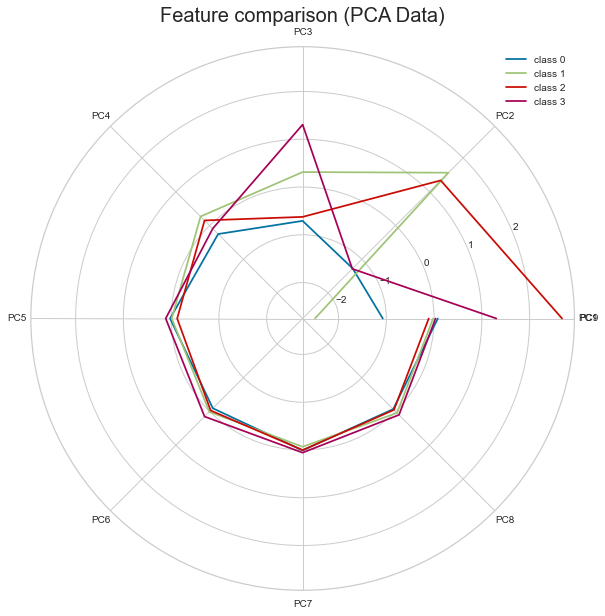

In [14]:
def spider_plot(data, title):
    means = data.groupby("LABELS").mean().to_numpy()
    names = data.columns[0:-1]
    label_loc = np.linspace(start=0, stop=2 * np.pi, num=len(names))
    categories = np.arange(0, len(means))
    plt.figure(figsize=(10,10))
    plt.subplot(polar=True)
    for i in range(len(means)):
        plt.plot(label_loc, means[i], label=f'class {categories[i]}')
    plt.title(f'Feature comparison ({title})', size=20)
    lines, labels = plt.thetagrids(np.degrees(label_loc), labels=names)
    plt.legend()
    plt.show()
spider_plot(pca_data, 'PCA Data')


Из данного графика видно что главная компонента 1, 2 и 3 (PC1, PC2, PC3), являются наиболее важными в наших кластерах.

Следующий график позволит понять нам наши кластеры более подробно.


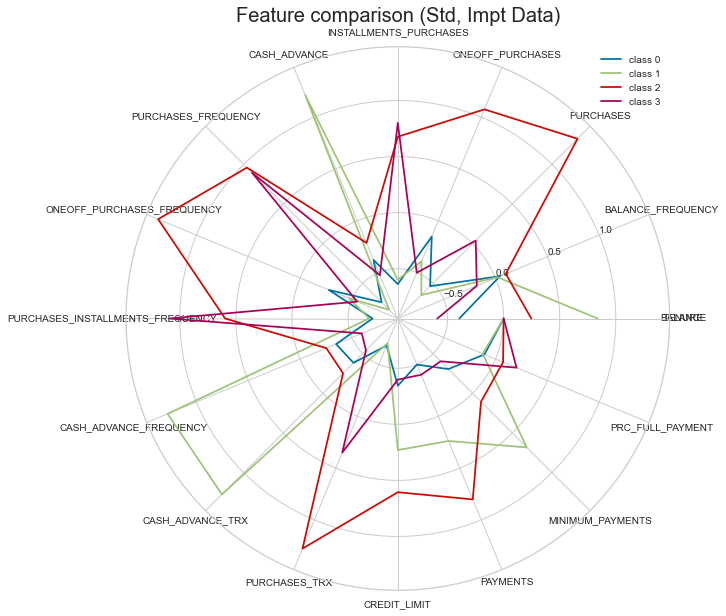

In [15]:
spider_plot(std_imp_data, 'Std, Impt Data')

Итак рассмотрим наши классы по порядку и поймем что они в себе несут.

Класс 3 содержит в себе клиентов, которые зарабатывают меньше всего, об этом говорит их Баланс BALANCE(правая линия, под BALANCE_FREQUENCY), который является самым низким из всех, однако несмотря на это они находятся на втором месте по покупкам PURCHASES. 

Казалось бы как люди зарабатывающие меньше всего, позволяют себе покупки в таком количестве, на этот вопрос нам отвечают две колонки ONEOFFPURCHASES  и ONEOFF PURCHASES FREQUENCY которые хранят в себе информацию о Максимальной сумме единовременной покупки и о том Как часто совершаются разовые покупки (1 = часто покупаются, 0 = редко покупаются). 
Исходя из этого мы делаем вывод что эти люди чаще всего пользуются рассрочкой. Об этом нам также говорят колонки INSTALLMENTSPURCHASES и PURCHASESINSTALLMENTSFREQUENCY- Сумма покупок в рассрочку и Как часто совершаются покупки в рассрочку (1 = часто, 0 = редко) соответственно.

Класс 0 показывает клиентов, которые не очень богаты и не рискуют. Их BALANCE - Баланс (сумма, оставшаяся на их счету для совершения покупок) ниже среднего, и они не покупают много (их PURCHASES Покупки также ниже среднего, а PURCHASE FREQUENCY- Частота покупок у них очень низкая.). Эти люди экономят каждую копейку, и не горят желаниям влезать в долги.

Класс 2 включает клиентов, которые имеют хороший доход (второй по величине BALANCE Баланс). Они покупают много (самая высокая PURCHASESFREQUENCY Частота покупок), как в рассрочку, так и за один раз. Так скажем люди которые зарабатывают достаточно и вполне закономерно тратят заработанные деньги на все что пожелают.

Класс 1 весьма странные, данные клиенты они имеют самый большой доход, о чем говорит самый большой BALANCE – Баланс, однако самые низки PURCHASES – Покупки. Но эти люди очень ярко выделяются среди всей массы по трем параметрам : CASHADVANCE - Предоставление наличных денег пользователем, CASHADVANCEFREQUENCY - Как часто выплачиваются наличные авансом, CASHADVANCETRX - Количество транзакций, совершенных с помощью «Cash in Advanced». 

Выдача наличных — это услуга, предоставляемая большинством эмитентов кредитных и платежных карт. Услуга позволяет держателям карт снимать наличные в банкомате или через кассу в банке или другом финансовом учреждении до определенного лимита. Для кредитной карты это будет кредитный лимит (или какой-то процент от него). Итак, эти клиенты не используют свои кредитные карты для покупок, вместо этого они получают наличные в банкоматах. Вопрос «Зачем?» остается открытым

Теперь используя данные только по двум параметрам BALANCE – Баланс и PURCHASES – Покупки, проверим гипотезу:
Если BALANCE низкий, а PURCHASES высокий ➡ Класс 3 Небогатые мечтатели
Если BALANCE низкий, а PURCHASES низкий ➡ Класс 0 Средний достаток
Если BALANCE высокий и PURCHASES высокий ➡ Класс 2 Высокий достаток
Если BALANCE высокий, а PURCHASES низкий ➡ Класс 1 Богатые люди, со своими особенными моментами
Построим скаттерплот для того чтобы проверить нашу гипотезу:


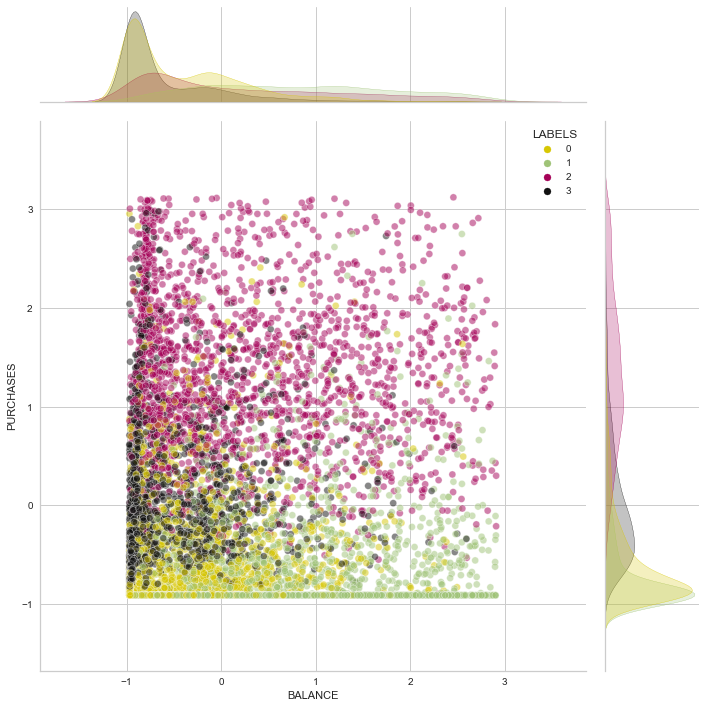

In [16]:
def colorful_scatter(data):   
    LABEL_COLOR_MAP = {0 : 'y',
                       1 : 'g',
                       2 : 'm',
                       3 : 'k'
                       }
    sns.jointplot(data=data, x="BALANCE", y="PURCHASES", hue="LABELS", palette=LABEL_COLOR_MAP, alpha=0.5, height=10)
colorful_scatter(std_imp_data)

Глядя на этот график можно сказать, что теория оказалась верна, и действительно: 
клиенты класса 3 тратят много, пока у них низкий баланс.
клиенты 0 класса имеют низкий баланс и тратят меньше других
клиенты класса 2 имеют высокий баланс и много покупают
клиенты класса 1 не покупают много, хотя у них много денег.
 В подтверждение этой гипотезе также можно привести график частоты покупок


In [17]:
def kde_plot(data,x):
    LABEL_COLOR_MAP = {0 : 'y',
                   1 : 'g',
                   2 : 'm',
                   3 : 'k'
                   }
    sns.kdeplot(data=data, x=x, hue="LABELS", palette=LABEL_COLOR_MAP)

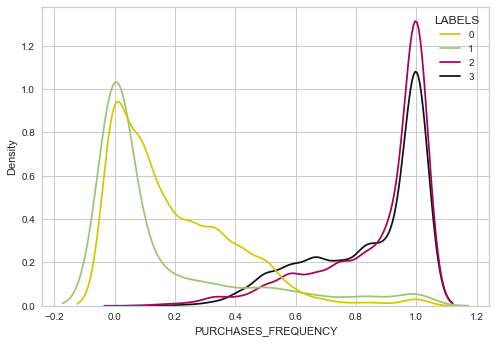

In [18]:
kde_plot(cc_general, 'PURCHASES_FREQUENCY')

Из графика мы видим что люди класса 2 и 3 покупают намного чаще чем люди из 1 и 0 классов.

Выводы: 
Данные полученные в ходе исследования будут переданы заказчику для дальнейшей работы. Полученные 4 класса клиентов кредитных карт, помогут банку составить индивидуальные предложения для клиентов из каждого класса. Клиентам из класса 3, например, которые часто берут рассрочки и спокойно их выплачивают, можно предлагать более выгодные процентные ставки, а также например присмотреться к клиентам из класса 1 предлагая им персональное обслуживание и менеджеров, но это уже предстоит прорабатывать сотрудникам отдела кредитования банка, после получения данных исследования.



2) Классификация
На том же датасете про страны попробуем осуществить задачу классификации. Предположим, что определенный нами номер кластера - истина и уже известен.

Задача: определить набор фичей, которые могут предсказать в дальнейшем к какому классу будут отсноситься новые пользователи карт.

Если BALANCE низкий, а PURCHASES высокий ➡ Класс 3 Небогатые мечтатели
Если BALANCE низкий, а PURCHASES низкий ➡ Класс 0 Средний достаток
Если BALANCE высокий и PURCHASES высокий ➡ Класс 2 Высокий достаток
Если BALANCE высокий, а PURCHASES низкий ➡ Класс 1 Богатые люди, со своими особенными моментами

В качестве фич рассмотрим все присущетсвующие признаки, цель - кластер.
Рассмотрим 3 метода классификации и определим наиболее точный:

метод ближайших соседей
метод опорных векторов
метод случайного леса
Начинаем с разделения нашей выборки на учебную и тестовую:

In [38]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

cc_general2 = std_imp_data.sample(frac=1)
X = cc_general2[['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES','INSTALLMENTS_PURCHASES','CASH_ADVANCE','PURCHASES_FREQUENCY','ONEOFF_PURCHASES_FREQUENCY','PURCHASES_INSTALLMENTS_FREQUENCY','CASH_ADVANCE_FREQUENCY','CASH_ADVANCE_TRX','PURCHASES_TRX','CREDIT_LIMIT','PAYMENTS','MINIMUM_PAYMENTS','PRC_FULL_PAYMENT','TENURE']]
y = cc_general2['LABELS']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [39]:
# Функция для вычисления средней абсолютной ошибки
def mae(y_test, y_pred):
    return np.mean(abs(y_test - y_pred))

# вводит модель, обучает модель и оценивает модель на тестовом наборе
def fit_and_evaluate(model):
    
    # Учим модель
    model.fit(X_train, y_train)
    
    # Прогнозируем и оцениваем
    model_pred = model.predict(X_test)
    model_mae = mae(y_test, model_pred)
    
    # Возвращает показатель производительности
    return model_mae

In [40]:
knn = KNeighborsClassifier(n_neighbors=5)
knn_mae = fit_and_evaluate(knn)

print('KNeighborsClassifier Performance on the test set: MAE = %0.4f' % knn_mae)

KNeighborsClassifier Performance on the test set: MAE = 0.1076


In [41]:
svm = SVC(kernel='linear')
svm_mae = fit_and_evaluate(svm)

print('Support Vector Machine Performance on the test set: MAE = %0.4f' % svm_mae)

Support Vector Machine Performance on the test set: MAE = 0.0186


In [42]:
random_forest_cl = RandomForestClassifier(n_estimators=20)
random_forest_cl_mae = fit_and_evaluate(random_forest_cl)

print('Random Forest Classifier Performance on the test set: MAE = %0.4f' % random_forest_cl_mae)

Random Forest Classifier Performance on the test set: MAE = 0.0886


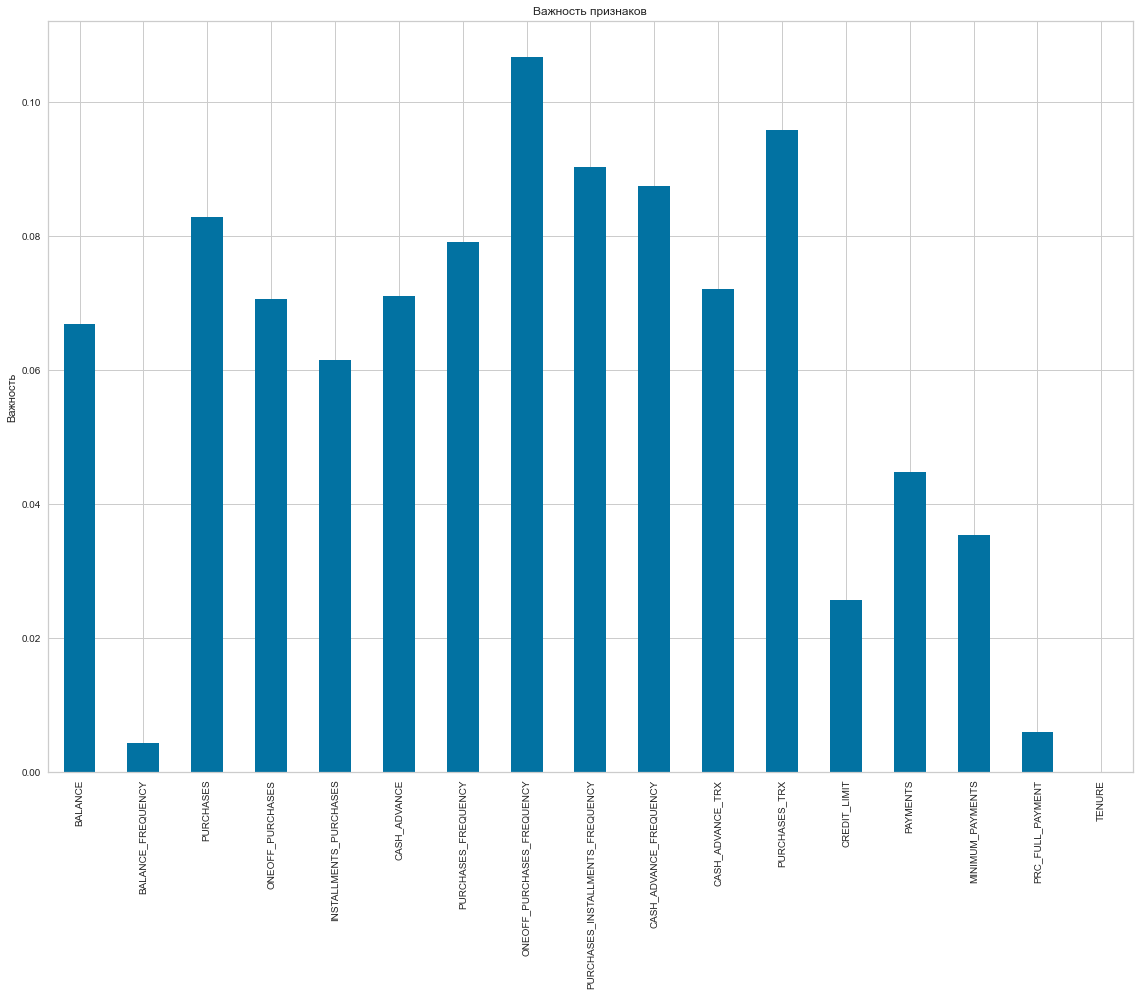

In [43]:
random_forest_cl = RandomForestClassifier(n_estimators=20)
random_forest_cl.fit(X_train, y_train)
random_forest_cl_imp = pd.Series(random_forest_cl.feature_importances_,
                         X_train.columns)

fig, ax = plt.subplots(figsize=(16,14))
random_forest_cl_imp.plot.bar(ax=ax)
ax.set_title("Важность признаков")
ax.set_ylabel('Важность')
fig.tight_layout()